

# About Dataset
Content

The dataset contains 2 folders

    Infected
    Uninfected
And a total of 27,558 images.

Acknowledgements
---
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/
And uploaded here, so anybody trying to start working with this dataset can get started immediately, as to download the
dataset from NIH website is quite slow.
Photo by Егор Камелев on Unsplash
https://unsplash.com/@ekamelev
Inspiration

Save humans by detecting and deploying Image Cells that contain Malaria or not!

Download from here: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria



In [1]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [2]:
#to download data
import gdown
dataset_url = "https://drive.google.com/u/1/uc?id=1FZDpYN2DuOv6O7_0bL4DPH9RxIEdQ3uk&export=download"
filename = "malaria.zip"
gdown.download(dataset_url, filename)

Downloading...
From: https://drive.google.com/u/1/uc?id=1FZDpYN2DuOv6O7_0bL4DPH9RxIEdQ3uk&export=download
To: /content/malaria.zip
100%|██████████| 708M/708M [00:02<00:00, 260MB/s]


'malaria.zip'

In [3]:
import zipfile
import shutil
zip_ref = zipfile.ZipFile("/content/malaria.zip", 'r')
zip_ref.extractall()
zip_ref.close()
shutil.rmtree('cell_images/cell_images')

In [4]:
import glob

In [5]:
plot_list = glob.glob('/content/cell_images/Parasitized/*.png')[:5]

In [6]:
print(type(plot_list))

<class 'list'>


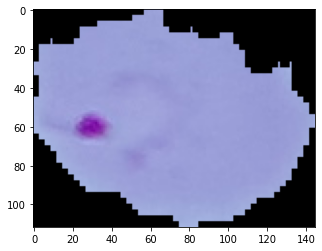

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_145422_cell_165.png')
plt.imshow(img)

In [8]:
import tensorflow as tf


In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory = '/content/cell_images',
                                                       validation_split = 0.2,
                                                       subset="training",
                                                       image_size = (120,120),
                                                       batch_size = 32,
                                                       seed = 123)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [10]:
validation_ds = tf.keras.utils.image_dataset_from_directory(directory = '/content/cell_images',
                                                       validation_split = 0.2,
                                                       subset="validation",
                                                       image_size = (120,120),
                                                       batch_size = 8,
                                                       seed = 123)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


# Augmentation

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.RandomFlip())
model.add(tf.keras.layers.RandomRotation(factor = 0.4))

model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3),
                                 activation = 'relu',
                                 input_shape = (120,120,3)))

model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(64, kernel_size = (3,3),
                                 activation = 'relu'))

model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [13]:
history = model.fit(train_ds, validation_data = validation_ds, epochs = 10)

Epoch 1/10
689/689 [==============================] - 62s 76ms/step - loss: 0.4198 - accuracy: 0.8024 - val_loss: 0.2097 - val_accuracy: 0.9212
Epoch 2/10
689/689 [==============================] - 54s 78ms/step - loss: 0.2164 - accuracy: 0.9244 - val_loss: 0.2130 - val_accuracy: 0.9291
Epoch 3/10
689/689 [==============================] - 51s 73ms/step - loss: 0.1918 - accuracy: 0.9369 - val_loss: 0.1764 - val_accuracy: 0.9436
Epoch 4/10
689/689 [==============================] - 52s 76ms/step - loss: 0.1789 - accuracy: 0.9421 - val_loss: 0.1790 - val_accuracy: 0.9443
Epoch 5/10
689/689 [==============================] - 51s 73ms/step - loss: 0.1725 - accuracy: 0.9456 - val_loss: 0.1585 - val_accuracy: 0.9519
Epoch 6/10
689/689 [==============================] - 50s 73ms/step - loss: 0.1672 - accuracy: 0.9483 - val_loss: 0.1474 - val_accuracy: 0.9532
Epoch 7/10
689/689 [==============================] - 50s 72ms/step - loss: 0.1628 - accuracy: 0.9503 - val_loss: 0.1522 - val_accuracy:

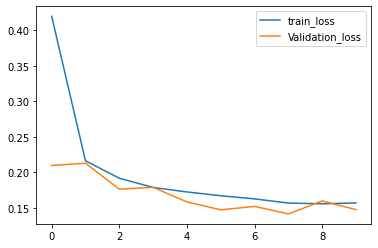

In [14]:
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(train_loss, label = 'train_loss')
plt.plot(validation_loss, label = 'Validation_loss')
plt.legend()
plt.show()

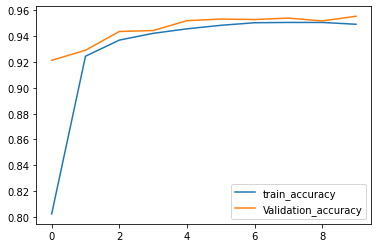

In [15]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy, label = 'train_accuracy')
plt.plot(validation_accuracy, label = 'Validation_accuracy')
plt.legend()
plt.show()